<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

----

This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [**here**](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

In [5]:
# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [17]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [19]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the Date column to a datetime type**

Use **pd.to_datetime** to convert the Date column to a datetime.

**WARNING**: The date column is formatted as day-month-year. Does **pd.to_datetime** work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check the [**documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for **pd.to_datetime**, and see if one of the settings fixes things.

In [27]:
pox['date']= pd.to_datetime(pox['date'],dayfirst=True)
pox['date']

0     2005-01-03
1     2005-01-10
2     2005-01-17
3     2005-01-24
4     2005-01-31
         ...    
517   2014-12-01
518   2014-12-08
519   2014-12-15
520   2014-12-22
521   2014-12-29
Name: date, Length: 522, dtype: datetime64[ns]

**Set the **Date** column to be the index**

In [29]:
pox.set_index('date', inplace=True)


In [33]:
# Ensure dates are in ascending order
pox.sort_index(inplace=True)

In [39]:
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

latest date = 2014-12-29

earliest date = 2005-01-03

**Plot a histogram of the Budapest cases column**

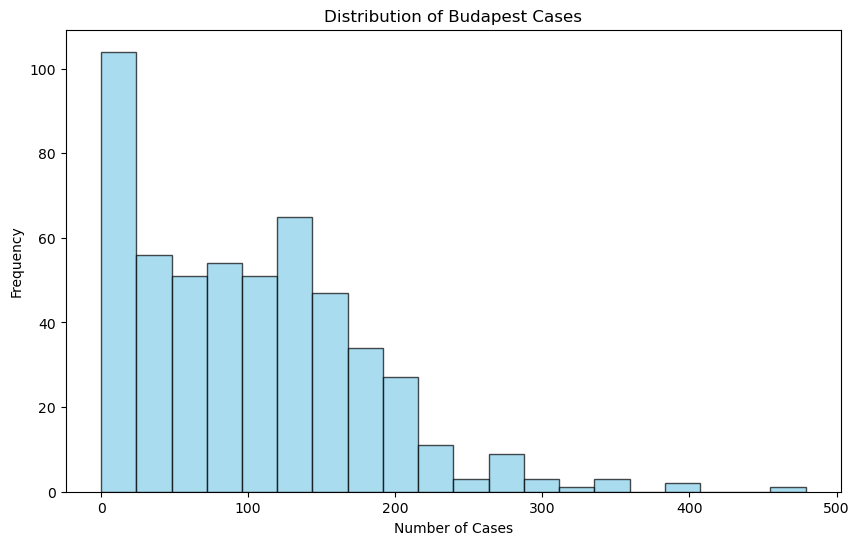

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(pox['budapest_cases'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Budapest Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show();

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method on the DataFrame to answer this question.

In [67]:
pox.resample('YE').sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

In [153]:
pox.resample('QE').sum()

,budapest_cases
date,
2005-03-31,1643.0
2005-06-30,1707.0
2005-09-30,563.0
2005-12-31,535.0
2006-03-31,2052.0
2006-06-30,2887.0
2006-09-30,942.0
2006-12-31,731.0
2007-03-31,1709.0


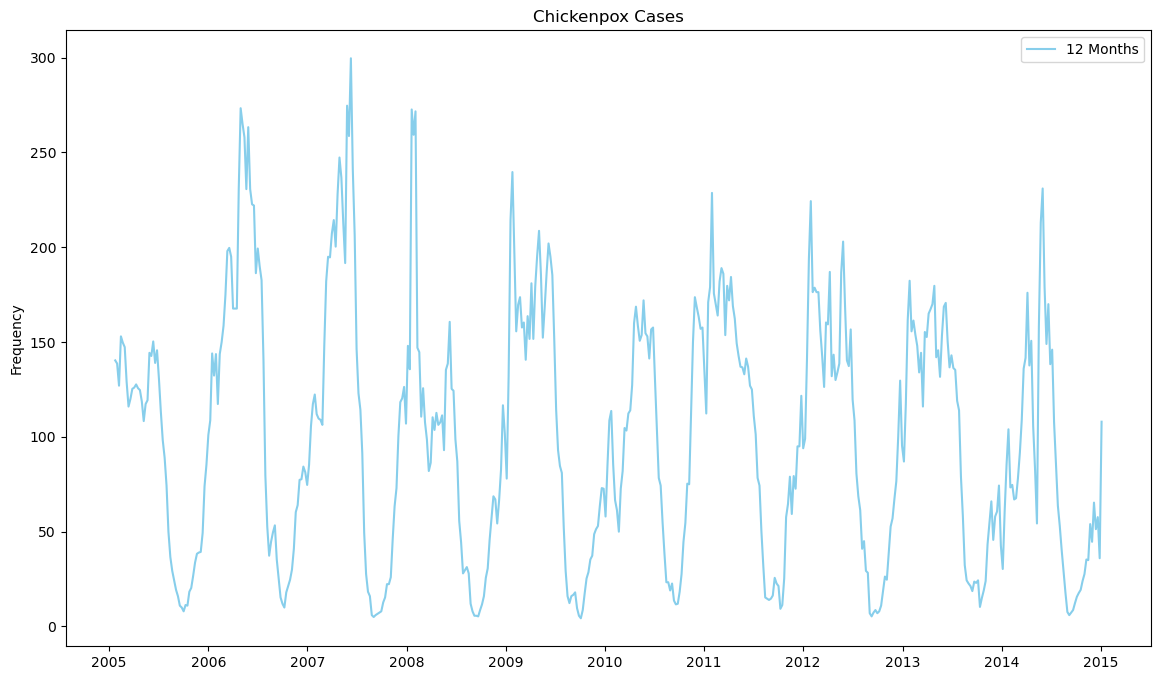

In [155]:
#Monthly
pox_case = pox['budapest_cases']

plt.figure(figsize=(14,8))

plt.plot(pox_case.rolling(3).mean(), color='skyblue', label='12 Months')
plt.title('Chickenpox Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**In short answer format, describe any apparent trends**

Strong seasonal pattern - spikes at regular intervals 
Gradual overall decay - suggests possible trend
Clear wave-like pattern - indicates consistent seasonal cycles

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

In [127]:
pox=pox.resample('W').mean()

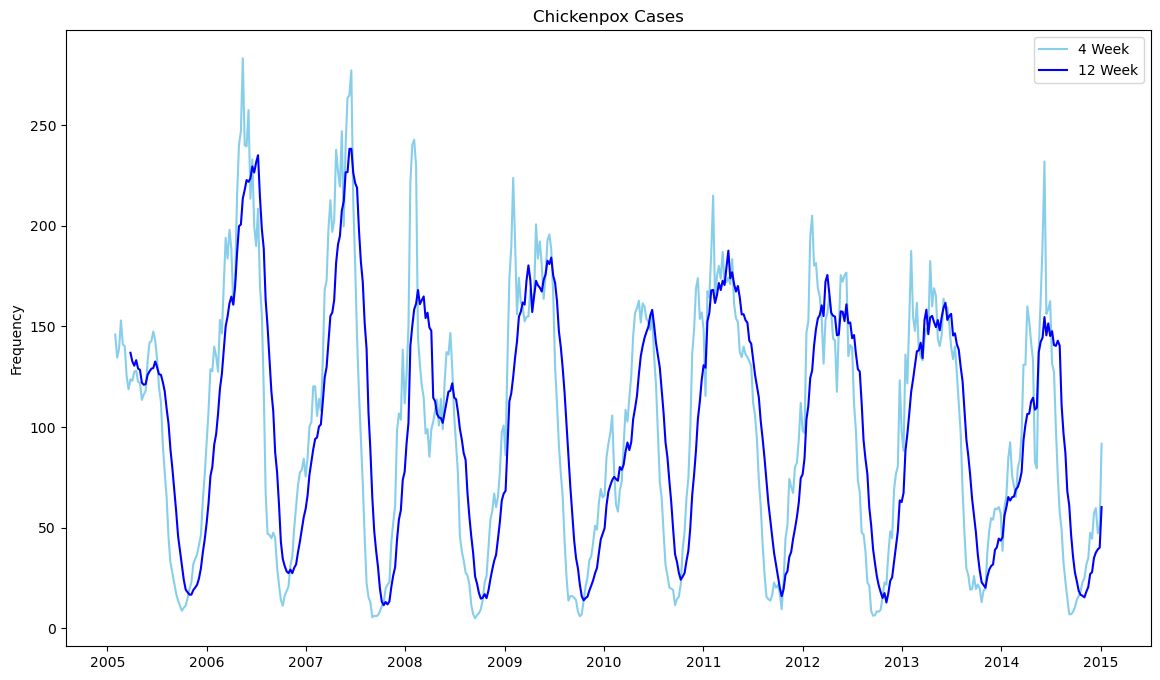

In [131]:
pox_case = pox['budapest_cases']

plt.figure(figsize=(14,8))

plt.plot(pox_case.rolling(4).mean(), color='skyblue', label='4 Week')
plt.plot(pox_case.rolling(12).mean(), color='blue', label='12 Week')
plt.title('Chickenpox Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Plot yearly chickenpox cases

You may need to use [**resample**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) again for this.

In [133]:
pox.resample('YE').sum()

,budapest_cases
date,
2005-12-31,4448.0
2006-12-31,6612.0
2007-12-31,6128.0
2008-12-31,4585.0
2009-12-31,5519.0
2010-12-31,5148.0
2011-12-31,5497.0
2012-12-31,5314.0
2013-12-31,5198.0


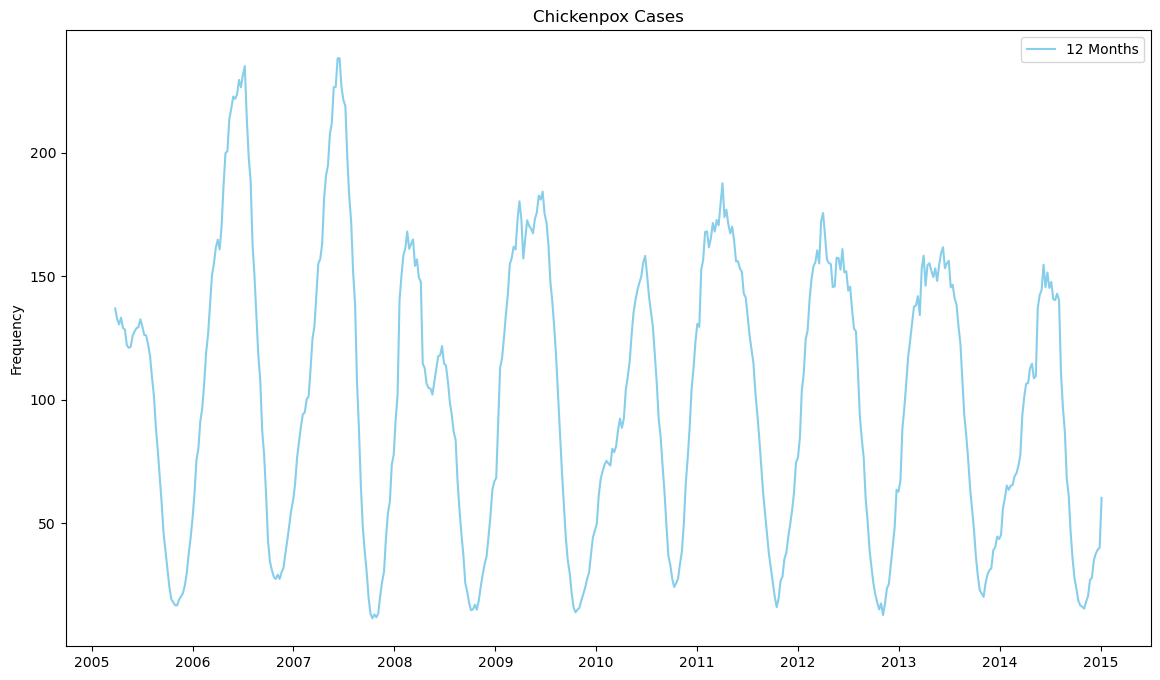

In [135]:
pox_case = pox['budapest_cases']

plt.figure(figsize=(14,8))

plt.plot(pox_case.rolling(12).mean(), color='skyblue', label='12 Months')
plt.title('Chickenpox Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()